# Installed Packages
# Tokenizer

In [1]:
# Here i will import all the libraries 
import numpy as np
import pandas as pd
import nltk
import tensorflow as tf
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
!pip install Tokenizer

     ------------------------------------ 112.3/112.3 kB 385.1 kB/s eta 0:00:00


In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [3]:
from tensorflow.keras.layers import Input,Embedding,LSTM,Dense,GlobalMaxPooling1D,Flatten

In [4]:
from tensorflow.keras.models import Model

# Above I have imported all the necessary packages

## Read the json file

In [6]:
with open('./Data/Chatbot.json') as Chatbot:
    botdata=json.load(Chatbot)

## All the data converting to the list

In [7]:
tags=[]
inputs=[]
response={}

for intents in botdata['intents']:
    response[intents['tag']]=intents['responses']
    for lines in intents['input']:
        inputs.append(lines)
        tags.append(intents['tag'])
            

## here we are converting inputs and tags to dataframe using pandas

In [8]:
data=pd.DataFrame({'Inputs':inputs,'tags':tags})
data.head()

,Inputs,tags
0,hello,greeting
1,hi there,greeting
2,nice to meet you,greeting
3,"hi, is this is the pirate's organization",greeting
4,any pirates here ?,greeting


### frac=1 which means the data has  been changed (permanently shuffled) 

In [9]:
data=data.sample(frac=1)

## Here we are going to perform some Preprocessing operation like
### ** such as like removing the punctuations
### ** converting the lowercase letters
### ** encoding the textual data to numerical data to done

### What is Preprocessing

### * ** Text preprocessing is a step in natural language processing (NLP) that involves cleaning and preparing text data for analysis. It is the process of bringing the text into a form that is predictable and analyzable for a specific task, such as extracting keywords or sentiment analysis. Text preprocessing may include tokenization, stemming, lemmatization, stop-word removal, and part-of-speech tagging.


In [10]:
import string  # using this lib to perform all string operation


In [11]:
data

,Inputs,tags
52,which place do you live in ?,whereareyou
55,you are from where,whereareyou
67,where is the straw hat center located ?,whereisthecenter
3,"hi, is this is the pirate's organization",greeting
35,how's everything there ?,howami
...,...,...
28,"bye bro, I'll talk to you later",goodbye
32,are you fine ?,howami
63,how to enroll,join
48,which country are you from ?,whereareyou


In [12]:
# we will perform text preprocessing for inputs column in the data DataFrame
data['Inputs']=data['Inputs'].apply(lambda input_data:[ltr.lower() for ltr in input_data if ltr not in string.punctuation])
data['Inputs']=data['Inputs'].apply(lambda input_data:''.join(input_data))

In [13]:
data

,Inputs,tags
52,which place do you live in,whereareyou
55,you are from where,whereareyou
67,where is the straw hat center located,whereisthecenter
3,hi is this is the pirates organization,greeting
35,hows everything there,howami
...,...,...
28,bye bro ill talk to you later,goodbye
32,are you fine,howami
63,how to enroll,join
48,which country are you from,whereareyou


#### above we removed the all the punctuation

### now we will perform the tokenize

## What does Tokenization mean?

###  Tokenization is a method to segregate a particular text into small chunks or tokens
URL: https://machinelearningknowledge.ai/keras-tokenizer-tutorial-with-examples-for-fit_on_texts-texts_to_sequences-texts_to_matrix-sequences_to_matrix/#:~:text=The%20fit_on_texts%20method%20is%20a%20part%20of%20Keras,derive%20more%20information%20by%20using%20the%20following%20attributes-

### 1. fit_on_texts
#### The fit_on_texts method is a part of Keras tokenizer class which is used to update the internal vocabulary for the texts list. We need to call be before using other methods of texts_to_sequences or texts_to_matrix.
#### ** some more function also available word_counts ,word_docs ,word_docs,word_docs 

### You could above website if any doubt and learn Tokenization concepts

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [15]:
tokenizer=Tokenizer(num_words=2000)

In [16]:
tokenizer.fit_on_texts(data['Inputs']) # Here we performed fit_on_texts below we can see the results

In [17]:
tokenizer.word_counts # once the fit_on_text method complete then we could see the words how many time present 

OrderedDict([('which', 2),
             ('place', 1),
             ('do', 8),
             ('you', 29),
             ('live', 4),
             ('in', 2),
             ('are', 19),
             ('from', 4),
             ('where', 10),
             ('is', 5),
             ('the', 21),
             ('straw', 4),
             ('hat', 3),
             ('center', 4),
             ('located', 1),
             ('hi', 5),
             ('this', 1),
             ('pirates', 5),
             ('organization', 3),
             ('hows', 2),
             ('everything', 4),
             ('there', 6),
             ('hello', 3),
             ('a', 2),
             ('chatbot', 1),
             ('tell', 2),
             ('me', 2),
             ('about', 3),
             ('prerequisites', 3),
             ('more', 2),
             ('pre', 2),
             ('requisites', 2),
             ('byr', 1),
             ('bro', 2),
             ('any', 1),
             ('here', 1),
             ('can', 3),
         

In [18]:
train=tokenizer.texts_to_sequences(data['Inputs']) # see once the texts_to_sequences fucntion that automatically conver corpus vector to inte

In [19]:
train

[[36, 63, 8, 1, 17, 37],
 [1, 3, 18, 7],
 [7, 13, 2, 19, 24, 20, 64],
 [14, 13, 65, 13, 2, 15, 25],
 [38, 21, 12],
 [26, 15],
 [3, 1, 39, 66],
 [40, 41, 27, 2, 28],
 [40, 41, 42, 27, 2, 43, 44],
 [67, 45],
 [68, 15, 69],
 [7, 29, 6, 46, 2, 30, 20],
 [4, 5, 10, 2, 25],
 [22, 70],
 [4, 5, 10],
 [4, 3, 1],
 [9, 29, 6, 47, 1],
 [14, 48, 5, 49, 1],
 [71, 1],
 [72],
 [7, 8, 1, 17, 37],
 [26, 12],
 [4, 8, 6, 73, 1],
 [9, 3, 2, 43, 44],
 [50],
 [7, 29, 6, 46, 2, 30, 20],
 [51, 51],
 [9, 3, 2, 74, 31],
 [75, 42, 76, 27, 2, 28],
 [7, 3, 1, 52, 77],
 [21, 32, 33, 23],
 [30, 78, 53],
 [6, 79, 54, 4, 3, 1],
 [55, 5, 10, 2, 25],
 [6, 16, 56, 1, 11],
 [53, 80, 2, 19, 24, 20],
 [13, 21, 23],
 [57],
 [50, 12],
 [9, 3, 2, 28],
 [4, 8, 6, 47, 1],
 [14],
 [7, 8, 1, 17],
 [3, 1, 39, 81],
 [7, 3, 1],
 [14, 12],
 [9, 13, 58, 59],
 [9, 3, 2, 31],
 [14, 12],
 [6, 16, 60, 5, 1, 11],
 [16, 82, 1, 11],
 [57, 83, 2, 84],
 [7, 3, 1, 18],
 [9, 3, 1],
 [4, 3, 85, 32, 33],
 [4, 8, 6, 34, 35],
 [26],
 [48, 5, 49, 1],
 

## Once tokenize done then we need  to perform apply padding

###  pad sequences in keras are smaller than num_timesteps, which was padded with the value until it was long

**When using the pad sequence in Keras, we need to use multiple parameters, the most important of which are padding and truncating. The keras pad sequences utility was used to preprocess the sequential data. Keras pad sequences are used to convert sample sequences to 2D numpy arrays.

In [20]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train=pad_sequences(train)

## Encoding the output

### Example Of Label Encoding
Suppose we have a column Height in some dataset that has elements as Tall, Medium, and short. To convert this categorical column into a numerical column we will apply label encoding to this column. After applying label encoding, the Height column is converted into a numerical column having elements 0,1, and 2 where 0 is the label for tall, 1 is the label for medium, and 2 is the label for short height.

Height	Height
Tall	0
Medium	1
Short	2

** Here is the botdata Tag element it has 8 items to we will apply for the labelencoding method to convert the catagorical 
column to numerical columns

URL : https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/

In [21]:
data['tags'].unique() # the tags columns it has some element

array(['whereareyou', 'whereisthecenter', 'greeting', 'howami',
       'whoareyou', 'prerequisites', 'goodbye', 'join'], dtype=object)

In [22]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y_train=labelencoder.fit_transform(data['tags'])


In [269]:
y_train

array([5, 5, 6, 1, 2, 1, 7, 4, 4, 0, 1, 6, 3, 0, 3, 2, 7, 1, 0, 0, 5, 1,
       7, 4, 1, 6, 1, 4, 4, 5, 2, 6, 2, 3, 0, 6, 2, 0, 1, 4, 7, 1, 5, 7,
       5, 1, 7, 4, 1, 0, 0, 0, 5, 7, 2, 3, 1, 1, 5, 3, 0, 3, 4, 5, 7, 7,
       1, 0, 3, 0, 0, 0, 2, 3, 4, 3, 0, 2, 3, 5, 0])

### |Tensorflow's tokenizer assigns a unique token to each distinct word. and padding is done to get all the data to the same length so as to send it to an rnn layer

In [23]:
input_seq_shape=x_train.shape[1]
input_seq_shape

8

In [25]:
vocabulary=len(tokenizer.word_index)
print('unique vocabulary:',vocabulary)
output_len=labelencoder.classes_.shape[0] # which dataset tags len
print('Output lenght:',output_len) 

unique vocabulary: 96
Output lenght: 8


## Neural Network

* ** Theoretically, every hidden layer can represent an embedding layer. We can extract an output of any hidden layers and treat it as an embedding vector. Still, the point is not only to lower the input dimension but also to create a meaningful relationship between them.

That is why particular types of neural networks are used only to generate embeddings.

URL: https://www.baeldung.com/cs/neural-nets-embedding-layers


In [26]:
i=Input(shape=(input_seq_shape,)) # create by input_layer
x=Embedding(vocabulary+1,10)(i)
x=LSTM(10,return_sequences=True)(x)  # (LSTM networks are an extension of recurrent neural networks (RNNs) ) 
x=Flatten()(x)
x=Dense(output_len,activation='softmax')(x)
model=Model(i,x)

### below we will compiling our model 
 

In [27]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.metrics import Accuracy                      


### Above Lib and all we dont need but incase if any error throws then import above lib 
#### Error-Type: model fit/ TypeError: 'NoneType' object is not callable

In [28]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [123]:
#model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

### now below we will train our model

In [29]:
train=model.fit(x_train,y_train,epochs=200)


Epoch 1/200
3/3 [==============================] - 3s 10ms/step - loss: 2.0807 - accuracy: 0.0864
Epoch 2/200
3/3 [==============================] - 0s 7ms/step - loss: 2.0768 - accuracy: 0.1481
Epoch 3/200
3/3 [==============================] - 0s 9ms/step - loss: 2.0739 - accuracy: 0.1605
Epoch 4/200
3/3 [==============================] - 0s 8ms/step - loss: 2.0706 - accuracy: 0.2346
Epoch 5/200
3/3 [==============================] - 0s 8ms/step - loss: 2.0673 - accuracy: 0.2346
Epoch 6/200
3/3 [==============================] - 0s 8ms/step - loss: 2.0635 - accuracy: 0.2469
Epoch 7/200
3/3 [==============================] - 0s 8ms/step - loss: 2.0601 - accuracy: 0.2469
Epoch 8/200
3/3 [==============================] - 0s 6ms/step - loss: 2.0558 - accuracy: 0.2469
Epoch 9/200
3/3 [==============================] - 0s 8ms/step - loss: 2.0517 - accuracy: 0.2469
Epoch 10/200
3/3 [==============================] - 0s 7ms/step - loss: 2.0468 - accuracy: 0.2469
Epoch 11/200
3/3 [==========

3/3 [==============================] - 0s 6ms/step - loss: 0.1421 - accuracy: 0.9877
Epoch 168/200
3/3 [==============================] - 0s 3ms/step - loss: 0.1394 - accuracy: 0.9877
Epoch 169/200
3/3 [==============================] - 0s 7ms/step - loss: 0.1383 - accuracy: 0.9877
Epoch 170/200
3/3 [==============================] - 0s 6ms/step - loss: 0.1367 - accuracy: 0.9877
Epoch 171/200
3/3 [==============================] - 0s 6ms/step - loss: 0.1333 - accuracy: 0.9877
Epoch 172/200
3/3 [==============================] - 0s 5ms/step - loss: 0.1314 - accuracy: 0.9877
Epoch 173/200
3/3 [==============================] - 0s 7ms/step - loss: 0.1296 - accuracy: 0.9877
Epoch 174/200
3/3 [==============================] - 0s 6ms/step - loss: 0.1291 - accuracy: 0.9877
Epoch 175/200
3/3 [==============================] - 0s 7ms/step - loss: 0.1261 - accuracy: 0.9877
Epoch 176/200
3/3 [==============================] - 0s 7ms/step - loss: 0.1261 - accuracy: 0.9877
Epoch 177/200
3/3 [=====

## Model analysis

#### create the plot for loss and accuracy so you can see the difference of loss

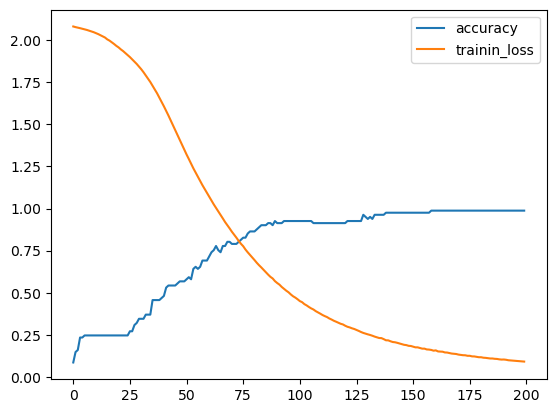

In [30]:
plt.plot(train.history['accuracy'],label="accuracy")
plt.plot(train.history['loss'],label='trainin_loss')
plt.legend()
#plt.plot(train.history['accuracy'])

# Tesing

#### this was very simple bot and very small amount of data but the same model also can be used with  large amount of data

In [31]:
import random

In [270]:
output

0

In [271]:
while True:
    text_p=[]
    prediction_input=input('User-Kp: ')
    #here user if gave any punctuation to remove that and convert lowercase pass the bot
    prediction_input=[ltr.lower() for ltr in prediction_input if ltr not in string.punctuation]
    prediction_input=''.join(prediction_input)
    
    # after remove punctuation and join them to append one list
    text_p.append(prediction_input)
    
    #then we will perform tokenizing and padding
    prediction_input=tokenizer.texts_to_sequences(text_p)
    prediction_input=np.array(prediction_input).reshape(-1)
    prediction_input=pad_sequences([prediction_input],input_seq_shape)
    
    #getting output from model
    output=model.predict(prediction_input)
    output=output.argmax()
    
    #finding the right tag and prediting
    response_tag=labelencoder.inverse_transform([output])[0]
    print('Bot-KP: ',random.choice(response[response_tag]))
    
    if response=='goodbye':
        break

User-Kp: i am fine
1/1 [==============================] - 0s 33ms/step
Bot-KP:  Goodbye
User-Kp: Hi
1/1 [==============================] - 0s 10ms/step
Bot-KP:  welcome aboard, how may I help you ?
User-Kp: how are you
1/1 [==============================] - 0s 23ms/step
Bot-KP:  Doing good.Thanks you are my best friend
User-Kp: are you fine
1/1 [==============================] - 0s 19ms/step
Bot-KP:  I am Going Merry and you could ask me questions about our organization
User-Kp: what about you
1/1 [==============================] - 0s 21ms/step
Bot-KP:  My name is Going Merry and yes, I am the G.O.A.T
User-Kp: how to get recruited ?
1/1 [==============================] - 0s 17ms/step
Bot-KP:  well. there are some pre-requisite and after you complete them, find the straw hat centers
User-Kp: where can I find the strawhat center ?
1/1 [==============================] - 0s 21ms/step
Bot-KP:  there are a lot of straw hat centers in the city you are in. find them.


KeyboardInterrupt: Interrupted by user